Our dataset is the covtype dataset.

This is the link to download the daset: https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/

Overall description:
- m X n = 581,012 X 55
Key features including: Elevation, Aspect, Slope etc.
The last column is the cover_type classification from 1 to 7.


#1. Import the input_path fot the dataset as csv file and necessary library

In [1]:
import os
import time
#Please fill in the input folder path and the output folder path
input_path = '/Users/phupham/Desktop/UniSyd/Semester3/MachineLearning/Assignment2/covtype.csv'
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

from sklearn.cross_validation import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


/Users/phupham/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#2. Read the value into attr_value for X and cat for Y and preliminary visualization of the data


In [2]:
df = pd.read_csv(input_path,header = None )
attr_value = df.iloc[:,0:53].values
cat = df[54].values

(581012, 55)

#3. Split the data 80% for training and 20% for testing and Preprocessing

In [4]:
Trainset,Testset,Trainset_cat, Testset_cat = train_test_split(attr_value, cat,test_size=0.2, random_state=0)

In [5]:
# Small data set for preprocessing test
X_train, X_test, y_train, y_test = train_test_split(Trainset, Trainset_cat, test_size=0.5, random_state=0)

In [29]:
'''
#Apply standard scaler
scaler = StandardScaler()
scaler.fit(X_train)  
scaler.fit(X_test)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
'''

/Users/phupham/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [ ]:
#3A. Preprocessing with PCA

In [11]:
'''
pca = PCA(n_components=10)
newtraining = pca.fit_transform(X_train_scale)
newtest = pca.transform(X_test_scale)
start_time = time.time()
sgd = SGDClassifier(loss="log",n_iter=1, class_weight = "balanced", average= True)
sgd.fit(newtraining,y_train)
pred = sgd.predict(newtest)
print("Processing time is %s seconds" % (time.time() - start_time))
a = accuracy_score(y_test, pred)
print(a)
'''

Processing time is 0.5626749992370605 seconds
0.61269766141


In [ ]:
#3B. Preprocessing with Variance Feature Selection

In [26]:
'''
selector = VarianceThreshold(threshold = 0.5)
newtraining = selector.fit_transform(X_train_scale)
newtest = selector.fit_transform(X_test_scale)
start_time = time.time()
sgd = SGDClassifier(loss="log",n_iter=1, class_weight = "balanced", average= True)
sgd.fit(newtraining,y_train)
pred = sgd.predict(newtest)
print("Processing time is %s seconds" % (time.time() - start_time))
a = accuracy_score(y_test, pred)
print(a)
'''

Processing time is 1.0449528694152832 seconds
0.656754372754


GIVEN VARIANCE FEATURE SELECTION PROVIDES BETTER ACCURACY RATE,APPLY VARIANCE FEATURE SELECTION AS CONSISTENT WITH OTHER METHODS

In [ ]:
#4. 10fold-Cross-validation and apply KNN

In [8]:
#Cross Validation
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(Trainset,Trainset_cat)
print(skf)

#Standard Scaler
scaler = StandardScaler()
scaler.fit(Trainset)  
scaler.fit(Testset)
X_train_scale = scaler.transform(Trainset)
X_test_scale = scaler.transform(Testset)

#Variance Feature Selection
selector = VarianceThreshold(threshold = 0.1)
newtraining = selector.fit_transform(X_train_scale)
newtest = selector.fit_transform(X_test_scale)

n=0
acc=[]
process=[]

for train_index,test_index in skf.split(newtraining,Trainset_cat):
    X_train, X_test = newtraining[train_index], newtraining[test_index]
    y_train, y_test = Trainset_cat[train_index], Trainset_cat[test_index]
    start_time = time.time()
    sgd = SGDClassifier(loss="log",n_iter=1, class_weight = None, average= True)
    sgd.fit(X_train,y_train)
    pred = sgd.predict(X_test)
    t = time.time() - start_time
    print("Processing time is %s seconds" % t)
    a = accuracy_score(y_test, pred)
    print("Accuracy for %d fold is %0.5f "%(n, a))
    n= n+1
    acc.append(a)
    process.append(t)
    

Processing time is 1.9189131259918213 seconds
Accuracy for 0 fold is 0.71624 
Processing time is 1.665403127670288 seconds
Accuracy for 1 fold is 0.71648 
Processing time is 2.333458185195923 seconds
Accuracy for 2 fold is 0.71817 
Processing time is 1.6551947593688965 seconds
Accuracy for 3 fold is 0.71284 
Processing time is 1.9045839309692383 seconds
Accuracy for 4 fold is 0.71260 
Processing time is 2.385756254196167 seconds
Accuracy for 5 fold is 0.71212 
Processing time is 1.7174830436706543 seconds
Accuracy for 6 fold is 0.71804 
Processing time is 1.9426169395446777 seconds
Accuracy for 7 fold is 0.71375 
Processing time is 1.8060128688812256 seconds
Accuracy for 8 fold is 0.71612 
Processing time is 1.5906519889831543 seconds
Accuracy for 9 fold is 0.72033 


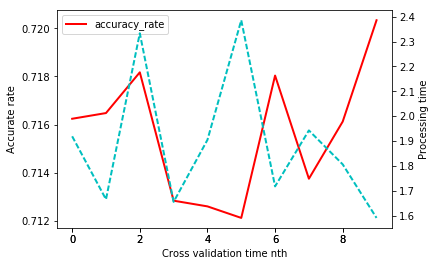

In [9]:
'''
fig1 =plt.figure()
ax1 = fig1.add_subplot(111)

line1 = ax1.plot(acc, 'r',label = "accuracy_rate",linewidth = 2,  )
ax1.set_ylabel("Accurate rate")

ax2 =fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(process, 'c--', label = "processing_time", linewidth = 2, linestyle = '--' )
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel("Processing time")
ax1.set_xlabel("Cross validation time nth")
#legend((line1, line2), ("accuracy_rate", "processing_time"))
#show()

ax1.legend(loc=0)
'''

#5. Apply the model to the Testset

In [10]:
sgd.fit(newtraining, Trainset_cat)
pred = sgd.predict(newtest)
a = accuracy_score(Testset_cat, pred)
print(a)


0.715816287015


In [11]:
report = metrics.classification_report(Testset_cat,pred)
print(report)

             precision    recall  f1-score   support

          1       0.70      0.70      0.70     42212
          2       0.75      0.79      0.77     56849
          3       0.62      0.87      0.73      7094
          4       0.71      0.17      0.27       569
          5       0.17      0.03      0.05      1886
          6       0.43      0.08      0.14      3502
          7       0.74      0.53      0.62      4091

avg / total       0.70      0.72      0.70    116203



In [12]:
#Table of the confusion matrix
y_true = pd.Series(Testset_cat)
y_pred = pd.Series(pred)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,7,All
True,,,,,,,,
1,29676,11778,23,0,21,4,710,42212
2,10681,44703,1178,0,130,121,36,56849
3,1,644,6207,32,33,177,0,7094
4,0,2,400,95,0,72,0,569
5,45,1629,153,0,57,2,0,1886
6,0,1141,1981,6,90,284,0,3502
7,1892,18,23,0,0,0,2158,4091
All,42295,59915,9965,133,331,660,2904,116203


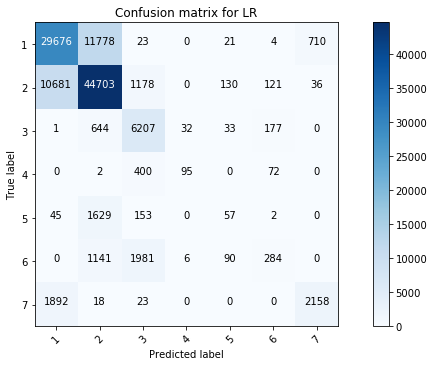

In [14]:
'''
confusion = metrics.confusion_matrix(Testset_cat,pred)
target_name = ['1','2','3','4','5','6','7']
def plot_cmatrix(cm,classes,title= 'Confusion matrix for Covtype',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
np.set_printoptions(precision=2)
plt.figure(figsize=(10, 5))
plot_cmatrix(confusion, classes=target_name,title='Confusion matrix for LR')
plt.show()
'''
    

In [15]:
'''
#Only run this for ROC curve
classifier = OneVsRestClassifier(sgd)
predicted_prob = classifier.fit(newtraining, Trainset_cat).predict_proba(newtest)
'''

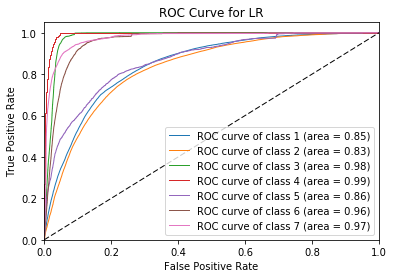

In [17]:
'''
accurate_y = label_binarize(Testset_cat, classes=[1,2,3,4,5,6,7])
n_classes = accurate_y.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range (n_classes):
    fpr[i], tpr[i], _ = roc_curve(accurate_y[:,i], predicted_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=1
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LR')
plt.legend(loc="lower right")
plt.show()
'''